In [31]:
# Import the necessary library we need for our data preparation: pandas package:
import pandas as pd
# Read in csv file containing data from consumer survey:
operator= pd.read_csv('data/organic_operator_eu.csv')
# Show dataframe:
operator

,DATAFLOW,LAST UPDATE,freq,unit,operator,procstat,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ORG_COPTYP(1.0),05/02/24 11:00:00,A,NR,PRD_AGRI,REG_END,AL,2021,130.0,NaN
1,ESTAT:ORG_COPTYP(1.0),05/02/24 11:00:00,A,NR,PRD_AGRI,REG_END,AT,2013,21863.0,NaN
2,ESTAT:ORG_COPTYP(1.0),05/02/24 11:00:00,A,NR,PRD_AGRI,REG_END,AT,2014,22184.0,NaN
3,ESTAT:ORG_COPTYP(1.0),05/02/24 11:00:00,A,NR,PRD_AGRI,REG_END,AT,2015,23070.0,NaN
4,ESTAT:ORG_COPTYP(1.0),05/02/24 11:00:00,A,NR,PRD_AGRI,REG_END,AT,2016,24213.0,NaN
...,...,...,...,...,...,...,...,...,...,...
610,ESTAT:ORG_COPTYP(1.0),05/02/24 11:00:00,A,NR,PRD_AQUA,REG_END,UK,2015,0.0,NaN
611,ESTAT:ORG_COPTYP(1.0),05/02/24 11:00:00,A,NR,PRD_AQUA,REG_END,UK,2016,0.0,NaN
612,ESTAT:ORG_COPTYP(1.0),05/02/24 11:00:00,A,NR,PRD_AQUA,REG_END,UK,2017,0.0,NaN
613,ESTAT:ORG_COPTYP(1.0),05/02/24 11:00:00,A,NR,PRD_AQUA,REG_END,UK,2018,14.0,NaN


In [32]:
# Show dataframe info:
operator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     615 non-null    object 
 1   LAST UPDATE  615 non-null    object 
 2   freq         615 non-null    object 
 3   unit         615 non-null    object 
 4   operator     615 non-null    object 
 5   procstat     615 non-null    object 
 6   geo          615 non-null    object 
 7   TIME_PERIOD  615 non-null    int64  
 8   OBS_VALUE    612 non-null    float64
 9   OBS_FLAG     6 non-null      object 
dtypes: float64(1), int64(1), object(8)
memory usage: 48.2+ KB


In [33]:
operator_clean = operator.drop(['DATAFLOW', 'LAST UPDATE','freq','operator','procstat','OBS_FLAG','unit'], axis=1)
operator_clean

,geo,TIME_PERIOD,OBS_VALUE
0,AL,2021,130.0
1,AT,2013,21863.0
2,AT,2014,22184.0
3,AT,2015,23070.0
4,AT,2016,24213.0
...,...,...,...
610,UK,2015,0.0
611,UK,2016,0.0
612,UK,2017,0.0
613,UK,2018,14.0


In [34]:
operator_clean = operator_clean.rename(columns={'geo': 'country_ID', 'TIME_PERIOD': 'year',
                                         'OBS_VALUE': 'OP_number'})
operator_clean

,country_ID,year,OP_number
0,AL,2021,130.0
1,AT,2013,21863.0
2,AT,2014,22184.0
3,AT,2015,23070.0
4,AT,2016,24213.0
...,...,...,...
610,UK,2015,0.0
611,UK,2016,0.0
612,UK,2017,0.0
613,UK,2018,14.0


<BarContainer object of 615 artists>

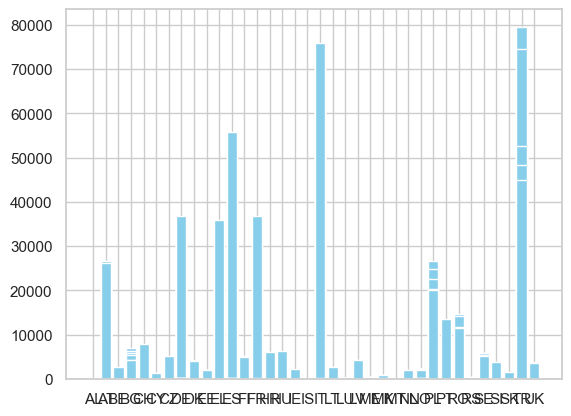

In [35]:
# Let's make a diagram, for this we import library matplotlib
import matplotlib.pyplot as plt

plt.bar(operator_clean['country_ID'], operator_clean['OP_number'], color='skyblue')

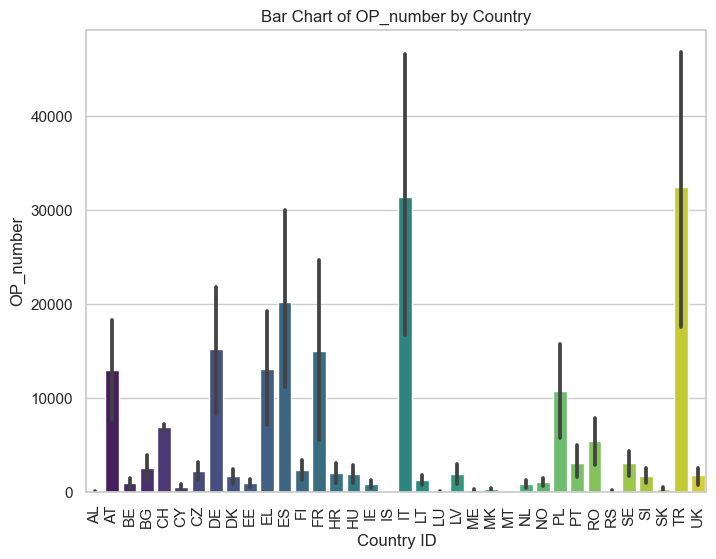

In [36]:
# import seaborn
import seaborn as sns
# setting the style seaborn
sns.set(style="whitegrid")
# building a barchart using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='country_ID', y='OP_number', data=operator_clean, palette='viridis')
plt.xlabel('Country ID')
plt.ylabel('OP_number')
plt.title('Bar Chart of OP_number by Country')
plt.xticks(rotation=90)
plt.show()

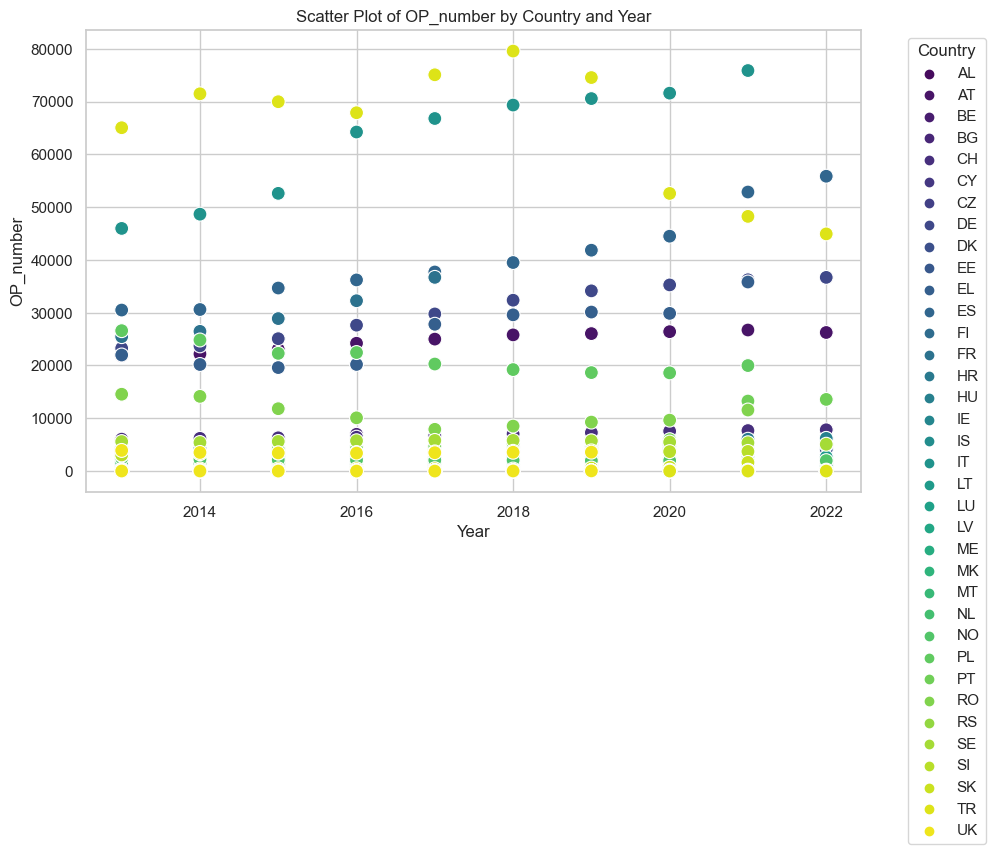

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='OP_number', hue='country_ID', data=operator_clean, palette='viridis', s=100)
plt.xlabel('Year')
plt.ylabel('OP_number')
plt.title('Scatter Plot of OP_number by Country and Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


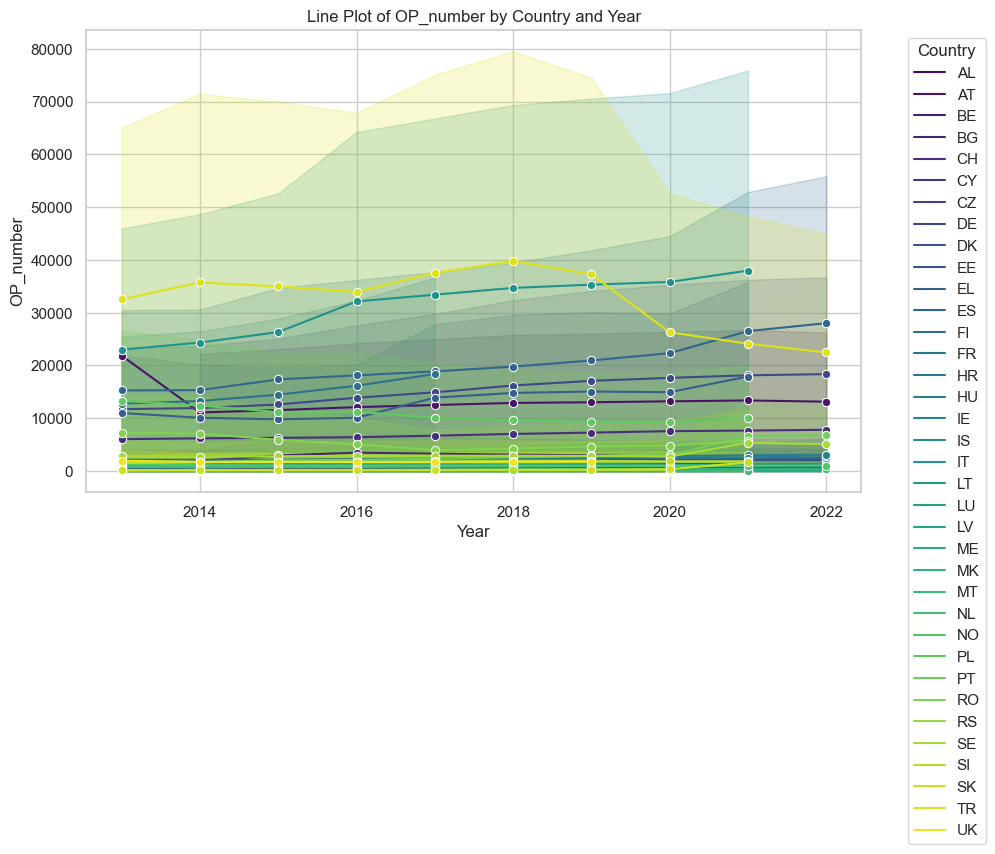

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='OP_number', hue='country_ID', data=operator_clean, palette='viridis', marker='o')
plt.xlabel('Year')
plt.ylabel('OP_number')
plt.title('Line Plot of OP_number by Country and Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Figure size 1000x600 with 0 Axes>

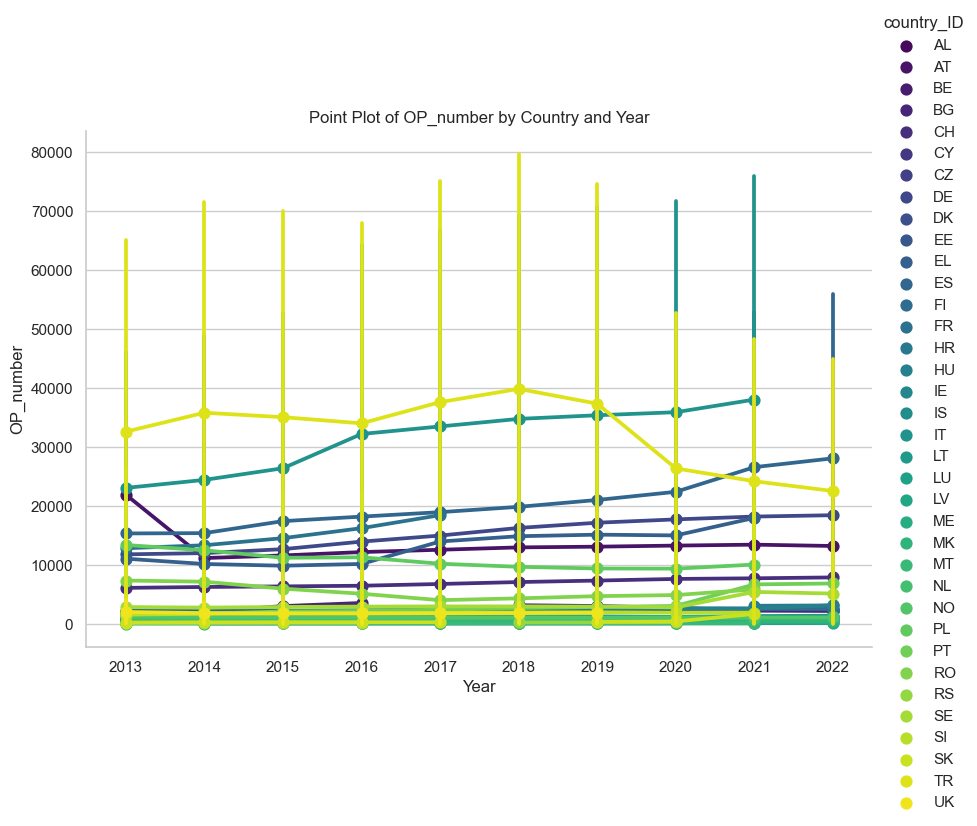

In [39]:
plt.figure(figsize=(10, 6))
sns.catplot(x='year', y='OP_number', hue='country_ID', data=operator_clean, kind='point', palette='viridis', height=6, aspect=1.5)
plt.xlabel('Year')
plt.ylabel('OP_number')
plt.title('Point Plot of OP_number by Country and Year')
plt.show()

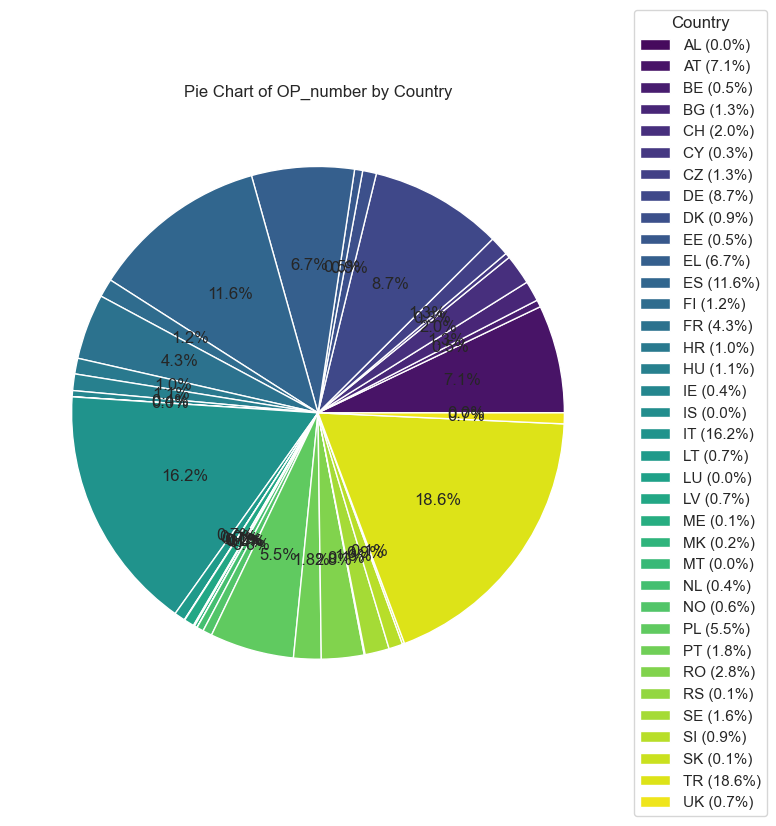

In [40]:
# Set the style in Seaborn
sns.set(style="whitegrid")

# Sum 'WT_1000' values for each country
sum_wt_by_country = operator_clean.groupby('country_ID')['OP_number'].sum()

# Calculate percentages
percentages = (sum_wt_by_country / sum_wt_by_country.sum()) * 100

# Plot pie chart with a longer color palette
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=None, autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=len(sum_wt_by_country)))
plt.title('Pie Chart of OP_number by Country')

# Create legend with percentages
legend_labels = [f"{country} ({percent:.1f}%)"
                 for country, percent in zip(sum_wt_by_country.index, percentages)]
plt.legend(labels=legend_labels, title='Country', bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()

In [41]:
import sql_functions as sqlf
engine = sqlf.get_engine()
schema = 'capstone_organicfood'
table_name = 'organic_operator_eu'
import psycopg2

In [45]:
if engine!=None:
    try:
        operator_clean.to_sql(name=table_name, # name of SQL table variable
                        con=engine, # engine or connection
                        schema=schema, # our class schema variable
                        if_exists='replace', # Drop the table before inserting new values
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None
else:
    print('No engine')

The organic_operator_eu table was imported successfully.


In [46]:
# Test: query the newly created table to count the rows (we know from above that the dataframe has 108 cases):
sqlf.get_dataframe(f'SELECT COUNT(*) FROM {schema}.organic_operator_eu;')

,count
0,615
